# Dollars and Votes


You're a reporter at [Mission Local](https://missionlocal.org/) an independent San Francisco-based news site. The [results have just come in](https://missionlocal.org/2024/03/election-results-march-2024-dccc-assembly-props-court-maps-live-updates/) for local elections that were held on March 5, 2024 One of the things on the ballot is the DCCC election, a committee that governs the local Democratic Party. 

Here's a bit of background information from the San Francisco Chronicle:

> Colloquially referred to as the “D-triple-C,” the DCCC governs the local Democratic Party. It’s made up of 24 elected members — 14 from the 17th Assembly District, which encompasses San Francisco’s east side, and 10 from the 19th Assembly District, which includes the city’s west side. It also has eight “ex-officio” members, consisting of San Francisco Democrats elected to state and federal offices.
>
> Every four years — during the primary election of a presidential election year — all elected DCCC seats are up for grabs and can be voted on by registered Democrats in San Francisco. 
>
> Often, this is a rather dull affair. Although the DCCC can be a stepping stone to higher office, it can nevertheless be a tough sell to potential candidates: The job has no salary, and it’s known for being a cutthroat political environment. 
>
> This year, however, the DCCC race is a marquee attraction. 
> 
> More than $2 million has been poured into the race by backers of the two main groups, or slates, of DCCC candidates — a potentially record sum. Most of that money comes from moderate tech-affiliated and labor groups supporting a moderate slate called SF Democrats for Change, which promises to restore “common sense” to a DCCC that it accuses of taking positions “out of sync with San Francisco voters,” including “defunding public safety initiatives” and refusing to take a stance on the 2022 school board recall. Labor groups, meanwhile, are backing the progressive Labor and Working Families slate, which promises to fight for a San Francisco “that works for everyone, not just the billionaires” and to protect the city from a reversion “back to failed Reagan-era policies.”
>
> There are 30 candidates running for 14 seats in the 17th district and 21 candidates fighting for 10 spots in the 19th.
> 
> Most of these candidates are running on the big slates. There are practical reasons for this: It’s extremely expensive for individual candidates to send out campaign mailers and ads. By joining forces and pooling funds, candidates can reach more people at a lower cost and benefit from the name recognition and political expertise of better-known contenders. 



[Source: San Francisco Chronicle](https://www.sfchronicle.com/opinion/article/democratic-county-central-committee-18682320.php)

You want write an article about the role money played in this election. So you download the data and start analyzing. **Did dollars buy votes in this election?**



## Setup 

(you can skip this part, it just sets up the notebook)

In [17]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

This is a Python notebook, but below is an R cell. The `%%R` at the top of the cell indicates that the code in this cell will be R code.

In [19]:
%%R

# My commonly used R imports

require('tidyverse')

## Load the data

In [20]:
df = pd.read_csv('dccc_data.csv')
df

,contest,amount_raised,slate,count,votes,race,won
0,Adolfo Velasquez,17453.0,progressive,23462.0,25.662004,DCCC,False
1,Anita Martinez,16572.0,progressive,26251.0,28.712525,DCCC,False
2,Bilal Mahmood,274675.0,moderate,33841.0,37.014230,DCCC,True
3,Brian Quan,52817.0,moderate,20938.0,29.512171,DCCC,False
4,Carrie Barnes,141043.0,moderate,30140.0,32.966192,DCCC,True
5,Catherine Stefani,121736.0,moderate,35676.0,50.285424,DCCC,True
6,Cedric Akbar,37666.0,moderate,28805.0,31.506010,DCCC,True
7,Connie Chan,61276.0,progressive,23036.0,32.469308,DCCC,True
8,Dan Calamuci,58752.0,moderate,21090.0,29.726415,DCCC,True
9,Emma Heiken,53969.0,moderate,32678.0,35.742177,DCCC,True


## Clean

In [25]:
%%R -i df 

df$won <- factor(df$won, levels=c(FALSE, TRUE), labels=c("Lost", "Won"))

## Analysis

In this section, use exploratory data analysis, as well as the statistical tools you've learned so far (t-test, chi-sq test, regression) to help you answer the question. 

Did money buy votes?

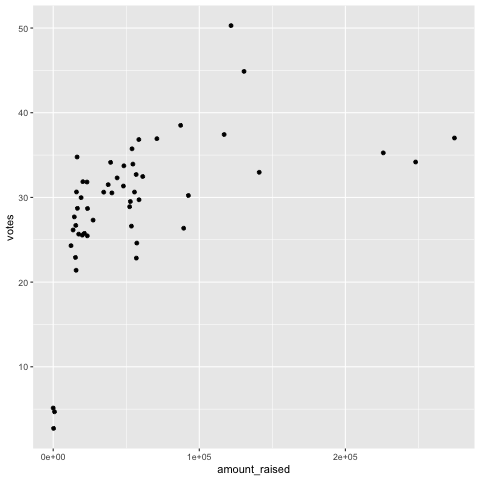

In [27]:
%%R
# contest	amount_raised	slate	count	votes	race	won
ggplot(df) + 
    aes(x=amount_raised, y=votes) + 
    geom_point()

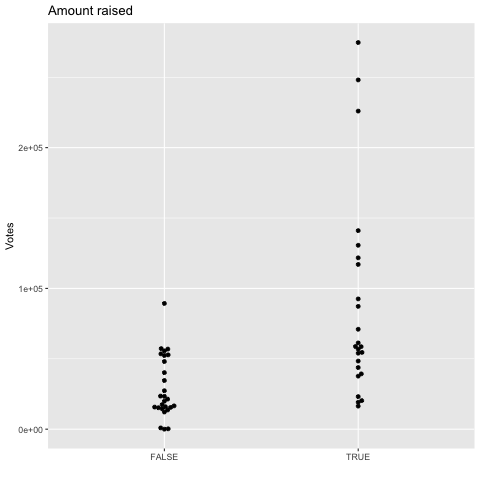

In [34]:
%%R 

library(ggbeeswarm)


ggplot(df) + 
    aes(x=won, y=amount_raised) + 
    geom_beeswarm() + 
    labs(title="Amount raised", x="", y="Votes")

In [23]:
%%R 

# More R code here

NULL


In [24]:
%%R 

# More R code here

NULL


## Conclusions and Questions

Based on your analysis above, what conclusions can you draw?

What reporting questions do you have?